# Working with Instrumental Descriptions

the instrumental description is loaded by the event source, and consists of a hierarchy of classes in the ctapipe.instrument module, the base of which is the `SubarrayDescription`

In [1]:
from ctapipe.utils.datasets import get_dataset_path
from ctapipe.io import EventSource
import numpy as np

filename = get_dataset_path("gamma_prod5.simtel.zst")

with EventSource(filename, max_events=1) as source:
    subarray = source.subarray

## the SubarrayDescription:

In [2]:
subarray.info()

Subarray : MonteCarloArray
Num Tels : 180
Footprint: 4.92 km2



       Type       Count     Tel IDs    
----------------- ----- ---------------
   SST_ASTRI_CHEC   120 30-99,131-180  
   LST_LST_LSTCam     4 1-4            
 MST_MST_FlashCam    28 5-29,125-127   
MST_MST_NectarCam    28 100-124,128-130


In [3]:
subarray.to_table()

tel_id,name,type,pos_x,pos_y,pos_z,camera_name,optics_name,camera_index,optics_index,tel_description
,,,m,m,m,,,,,
int16,str5,str3,float32,float32,float32,str9,str5,int64,int64,str17
1,LST,LST,-20.643,-64.817,34.3,LSTCam,LST,2,1,LST_LST_LSTCam
2,LST,LST,79.993996,-0.768,29.4,LSTCam,LST,2,1,LST_LST_LSTCam
3,LST,LST,-19.396,65.2,31.0,LSTCam,LST,2,1,LST_LST_LSTCam
4,LST,LST,-120.033,1.151,33.1,LSTCam,LST,2,1,LST_LST_LSTCam
5,MST,MST,-0.017,-0.001,24.35,FlashCam,MST,1,2,MST_MST_FlashCam
6,MST,MST,-1.468,-151.221,31.0,FlashCam,MST,1,2,MST_MST_FlashCam
7,MST,MST,-3.1379998,-325.245,39.0,FlashCam,MST,1,2,MST_MST_FlashCam
8,MST,MST,1.4339999,151.22,25.0,FlashCam,MST,1,2,MST_MST_FlashCam


You can also get a table of just the `OpticsDescriptions` (`CameraGeometry` is more complex and can't be stored on a single table row, so each one can be converted to a table separately)

In [4]:
subarray.to_table(kind="optics")

optics_name,size_type,reflector_shape,mirror_area,n_mirrors,n_mirror_tiles,equivalent_focal_length,effective_focal_length
,,,m2,,,m,m
str5,str3,str20,float64,int64,int64,float64,float64
ASTRI,SST,SCHWARZSCHILD_COUDER,14.126235008239746,2,2,2.1500000953674316,2.1519100666046143
LST,LST,PARABOLIC,386.7332458496094,1,198,28.0,29.30565071105957
MST,MST,HYBRID,106.2413558959961,1,86,16.0,16.445049285888672


Make a sub-array with only SC-type telescopes:

In [5]:
sc_tels = [tel_id for tel_id, tel in subarray.tel.items() if tel.optics.n_mirrors == 2]
newsub = subarray.select_subarray(sc_tels, name="SCTels")
newsub.info()

Subarray : SCTels
Num Tels : 120
Footprint: 4.92 km2

     Type      Count    Tel IDs   
-------------- ----- -------------
SST_ASTRI_CHEC   120 30-99,131-180


can also do this by using `Table.group_by`

## Explore some of the details of the telescopes

In [6]:
tel = subarray.tel[1]
tel

TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam')

In [7]:
tel.optics.mirror_area

<Quantity 386.73324585 m2>

In [8]:
tel.optics.n_mirror_tiles

198

In [9]:
tel.optics.equivalent_focal_length

<Quantity 28. m>

In [10]:
tel.camera

CameraDescription(name=LSTCam, geometry=LSTCam, readout=LSTCam)

In [11]:
tel.camera.geometry.pix_x

<Quantity [ 0.        , -0.0377967 , -0.04724547, ...,  0.67088033,
           -0.45356484, -0.50081024] m>

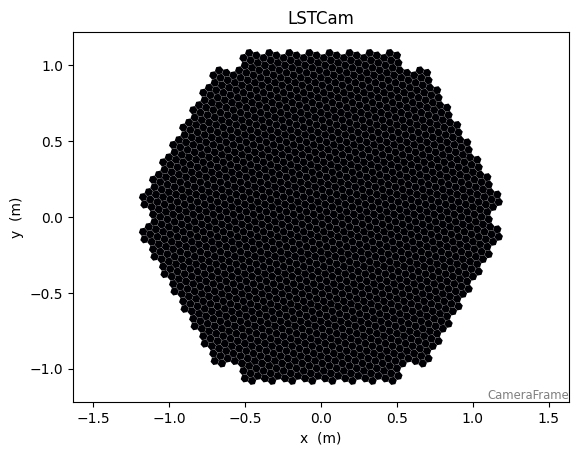

In [12]:
%matplotlib inline
from ctapipe.visualization import CameraDisplay

CameraDisplay(tel.camera.geometry)

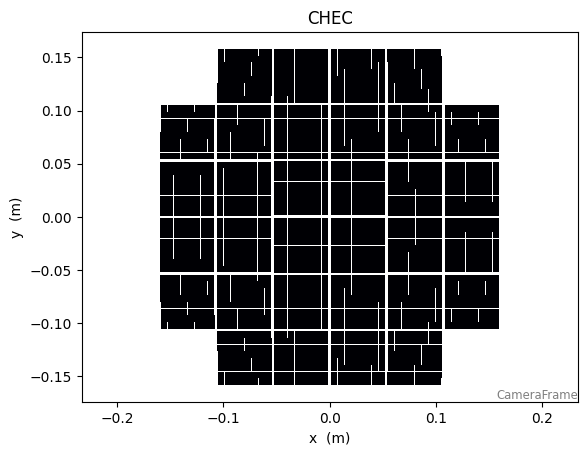

In [13]:
CameraDisplay(subarray.tel[98].camera.geometry)

## Plot the subarray

We'll make a subarray by telescope type and plot each separately, so they appear in different colors.  We also calculate the radius using the mirror area (and exagerate it a bit).

This is just for debugging and info, for any "real" use, a `visualization.ArrayDisplay` should be used

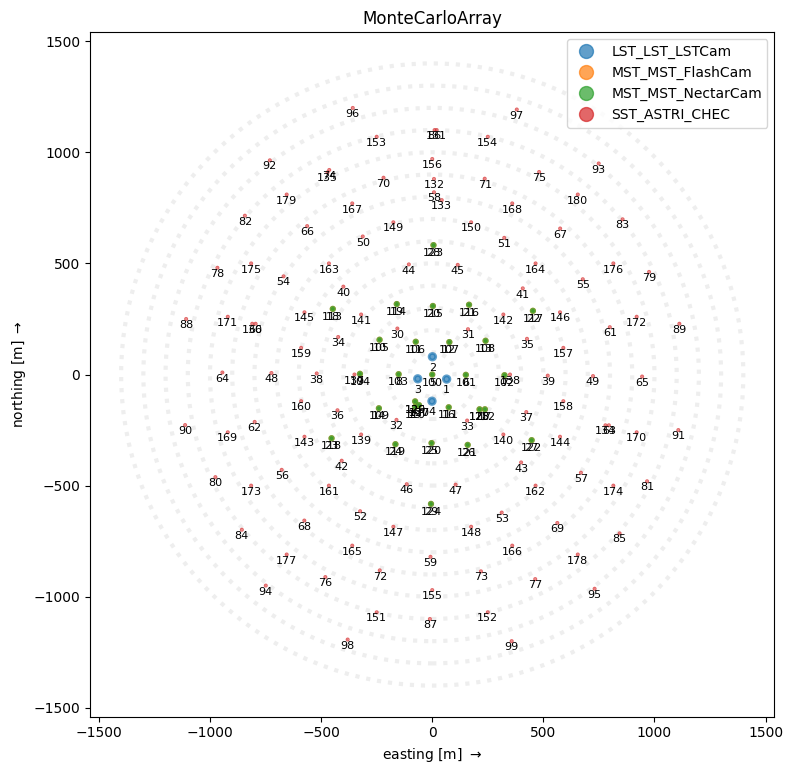

In [14]:
subarray.peek()

In [15]:
subarray.footprint

<Quantity 4.92346317 km2>

## Get info about the subarray in general

In [16]:
subarray.telescope_types

(TelescopeDescription(type='SST', optics_name='ASTRI', camera_name='CHEC'),
 TelescopeDescription(type='LST', optics_name='LST', camera_name='LSTCam'),
 TelescopeDescription(type='MST', optics_name='MST', camera_name='FlashCam'),
 TelescopeDescription(type='MST', optics_name='MST', camera_name='NectarCam'))

In [17]:
subarray.camera_types

(CameraDescription(name=CHEC, geometry=CHEC, readout=CHEC),
 CameraDescription(name=FlashCam, geometry=FlashCam, readout=FlashCam),
 CameraDescription(name=LSTCam, geometry=LSTCam, readout=LSTCam),
 CameraDescription(name=NectarCam, geometry=NectarCam, readout=NectarCam))

In [18]:
subarray.optics_types

(OpticsDescription(name=ASTRI, size_type=SST, reflector_shape=SCHWARZSCHILD_COUDER, equivalent_focal_length=2.15 m, effective_focal_length=2.15 m, n_mirrors=2, mirror_area=14.13 m2),
 OpticsDescription(name=LST, size_type=LST, reflector_shape=PARABOLIC, equivalent_focal_length=28.00 m, effective_focal_length=29.31 m, n_mirrors=1, mirror_area=386.73 m2),
 OpticsDescription(name=MST, size_type=MST, reflector_shape=HYBRID, equivalent_focal_length=16.00 m, effective_focal_length=16.45 m, n_mirrors=1, mirror_area=106.24 m2))

In [19]:
from astropy.coordinates import SkyCoord
from ctapipe.coordinates import GroundFrame

center = SkyCoord("10.0 m", "2.0 m", "0.0 m", frame="groundframe")
coords = subarray.tel_coords  # a flat list of coordinates by tel_index
coords.separation(center)

<Angle [115.63014925,  23.28019825,  94.78251809, 160.63833105,
         90.03968582, 101.62099853, 101.77713186,  78.30773406,
         78.17454627,  45.45999318,  16.99024097,  39.97681403,
         69.10011445, 110.92884517, 139.89780763, 161.89929049,
        134.2346161 ,  45.32551882,  15.68600633,  12.39167346,
         39.26720394,  69.03997654, 111.01749555, 140.58856049,
        166.95920229, 163.5926509 , 134.48337671,  11.93286185,
        167.6312177 ,  26.03184384,  49.71482147, 130.25249696,
        153.46499701,  56.96848545,  80.68305003,  99.34352352,
        122.90613377,  78.14518161, 101.82393586,  34.03013531,
         57.77812763, 122.25987001, 145.65400609,   1.24847673,
         24.4351971 , 155.4045918 , 176.51634911,  78.14317624,
        101.82029017,  15.42110816,  39.11960335, 140.84366604,
        164.08053533,  45.2944    ,  69.0116324 , 111.02764679,
        134.53170892,  11.86334528, 167.95021132,  62.66858341,
         86.38258597,  93.62776638, 117.

## Telescope IDs vs Indices

Note that `subarray.tel` is a dict mapped by `tel_id` (the indentifying number of a telescope).  It is  possible to have telescope IDs that do not start at 0, are not contiguouous (e.g. if a subarray is selected).  Some functions and properties like `tel_coords` are numpy arrays (not dicts) so they are not mapped to the telescope ID, but rather the *index* within this SubarrayDescription. To convert between the two concepts you can do:

In [20]:
subarray.tel_ids_to_indices([1, 5, 23])

array([ 0,  4, 22])

or you can get the indexing array directly in numpy or dict form:

In [21]:
subarray.tel_index_array

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [22]:
subarray.tel_index_array[[1, 5, 23]]

array([ 0,  4, 22])

In [23]:
subarray.tel_indices[
    1
]  # this is a dict of tel_id -> tel_index, so we can only do one at once

0

In [24]:
ids = subarray.get_tel_ids_for_type(subarray.telescope_types[0])
ids

(30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180)

In [25]:
idx = subarray.tel_ids_to_indices(ids)
idx

array([ 29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179])

In [26]:
subarray.tel_coords[idx]

<SkyCoord (GroundFrame): (x, y, z) in m
    [(  207.036  ,   156.949    , 14.25),
     (  203.986  ,  -160.894    , 19.75),
     ( -204.02   ,   160.893    , 22.25),
     ( -207.07   ,  -156.95     , 28.25),
     (  168.88199,   423.275    , 18.25),
     (  160.729  ,  -426.44     , 33.25),
     ( -160.76201,   426.43802  , 10.25),
     ( -168.916  ,  -423.27698  , 42.25),
     (    4.972  ,   519.86896  , 11.75),
     (   -5.006  ,  -519.87103  , 41.25),
     (  395.51   ,   399.996    , 11.25),
     (  387.762  ,  -407.513    , 28.25),
     ( -387.795  ,   407.512    , 13.25),
     ( -395.545  ,  -399.99698  , 50.25),
     (  495.605  ,   105.269005 ,  9.25),
     (  493.494  ,  -114.760994 , 11.75),
     ( -493.528  ,   114.76     , 28.25),
     ( -495.64   ,  -105.269005 , 30.25),
     (    6.927  ,   723.596    , 11.75),
     (   -6.961  ,  -723.599    , 59.75),
     (  621.223  ,   312.711    ,  7.25),
     (  615.114  ,  -324.075    , 19.25),
     ( -615.14197,   324.575    , 19

so, with that method you can quickly get many telescope positions at once (the alternative is to use the dict `positions` which maps `tel_id` to a position on the ground

In [27]:
subarray.positions[1]

<Quantity [-20.643, -64.817,  34.3  ] m>